In [14]:
import os
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator
from typing import List, Dict, Union, Optional
import matplotlib.pyplot as plt

def find_tensorboard_file(folder: str) -> Optional[str]:
    """
    Search for TensorBoard file (.tfevents) in a folder.

    Args:
        log_dir (str): Path to directory with log file.

    Returns:
        Optional[str]: Complete path to .tfevents file if found else None.
    """
    if not os.path.isdir(folder):
        print(f"Error: folder {folder} does not exist.")
        return None
    
    # Find the tensorBoard file
    for filename in os.listdir(folder):
        if filename.startswith("events.out"):
            # Return its complete path
            return os.path.join(folder, filename)
            
    print(f"No TensorBoard found in {folder}.")
    return None

def extract_scalars(file_path: str) -> Dict[str, List[float]]:
    """
    Extract scalar metrics saved in a TendorBoard file.

    Args:
        event_file_path (str): Path to a .tfevents file.

    Returns:
        Dict[str, List[float]]: Dictionary with the scalar metrics saved in the file.
    """
    if not os.path.exists(file_path):
        print(f"Error: {file_path} not found.")
        return {}
    
    event_acc = EventAccumulator(file_path)
    event_acc.Reload()
    extracted_metrics = {}
    scalar_tags = event_acc.Tags()['scalars']
    
    # For each tag
    for tag in scalar_tags:
        # Save all values in a list
        values_list = [event.value for event in event_acc.Scalars(tag)]
        
        # List in a dictionary with tag as key
        extracted_metrics[tag] = values_list
    
    return extracted_metrics

def plot_scalar(list_of_dicts: List[Dict[str, List[float]]], key_to_plot: str):
    """
    Plotta i valori corrispondenti a una chiave specificata da una lista di dizionari.

    Args:
        list_of_dicts (List[Dict[str, List[float]]]): Una lista di dizionari,
                                                     ognuno contenente liste di valori.
        key_to_plot (str): La chiave del dizionario i cui valori devono essere plottati.
    """
    plt.figure(figsize=(10, 6))
    if not any(key_to_plot in d for d in list_of_dicts):
        print(f"Errore: La chiave '{key_to_plot}' non è presente in nessuno dei dizionari.")
        return
        
    markers = ['o', 's', '^', 'D', 'p', '*', 'h', 'v', '>', '<', 'x', '+']
    # For each dictionary given
    for i, data_dict in enumerate(list_of_dicts):
        if key_to_plot in data_dict:
            values = data_dict[key_to_plot]
            # Customize label and line
            style = markers[i%len(markers)]
            plt.plot(values, label=f'Model {data_dict["name"]}', marker=style)
            
    # Aggiungi un titolo, etichette e una legenda
    plt.title(f'{key_to_plot} accross different models')
    plt.xlabel('Rounds')
    plt.ylabel(key_to_plot)
    plt.legend()
    plt.grid(True)
    
    # Mostra il grafico
    plt.show()

In [15]:
path = "output/ClusterAvg/s0-pre"
file = find_tensorboard_file(path)
s0 = extract_scalars(file)
s0["name"] = "s0"

path = "output/ClusterAvg/s1-pre"
file = find_tensorboard_file(path)
s1 = extract_scalars(file)
s1["name"] = "s1"

path = "output/ClusterAvg/s2-pre"
file = find_tensorboard_file(path)
s2 = extract_scalars(file)
s2["name"] = "s2"


lista = [s0, s1, s2]

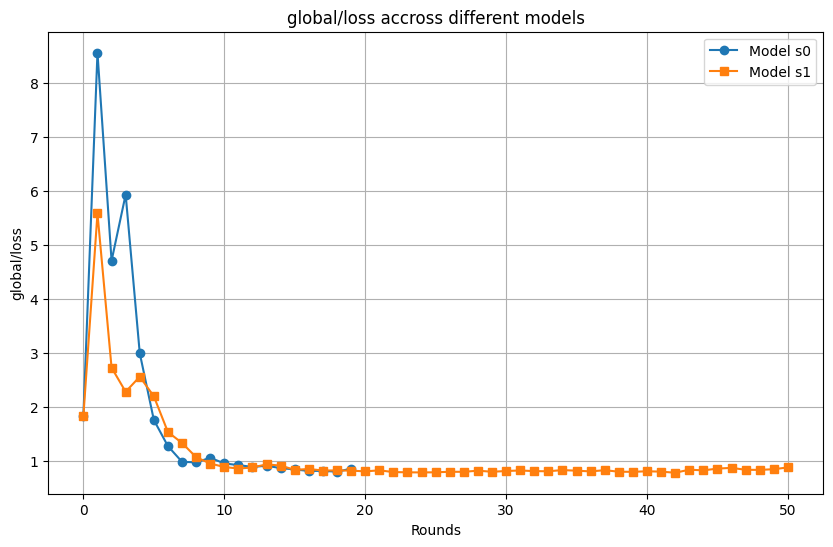

In [16]:
plot_scalar(lista, "global/loss")